In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Pertubation voltage

Setup

In [14]:
N = 2 ** 11
Dt = 1e-3
L = 10 # in nm
D0 = 1e-10 * 1e9 ** 2
M = 1000
T0 = M * L ** 2 / D0



# create time axis
time = np.zeros(N, dtype = np.float64)
for j in range(0,N):
    time[j] = j*Dt

# Sampling and Nyquist Frequency
f_Ny = np.floor(1.0 / (2.2 * Dt)) # Maximal frerquency with secturity 2.2, floor that
f_s = 1.0 / (N * Dt)

print("Nyquist Frequency", f_Ny / T0)
print("Sample Frequency", f_s / T0)
print("Number of Points", N)

print(D0)

Nyquist Frequency 454000.0
Sample Frequency 488.28125
Number of Points 2048
100000000.0


A 0.1999999895500665
shift 44.99999849653352


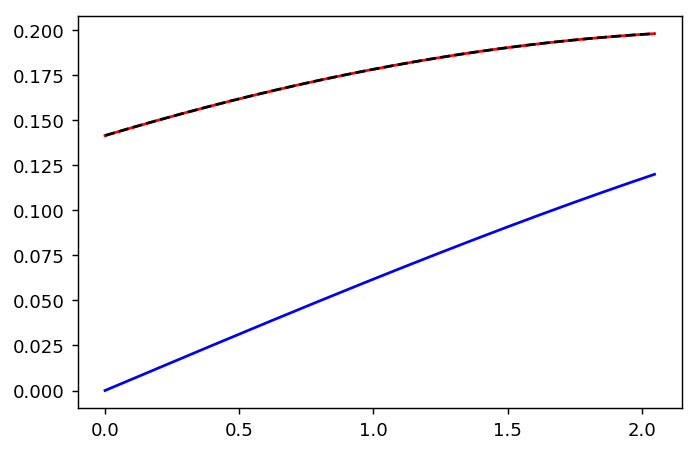

[1.15021638e-08 1.41421353e-01 1.41421345e-01]
[[ 2.56513615e-21 -9.96660312e-22 -2.47840979e-21]
 [-9.96660312e-22  8.07820357e-22  8.28290558e-22]
 [-2.47840979e-21  8.28290558e-22  2.45575240e-21]]


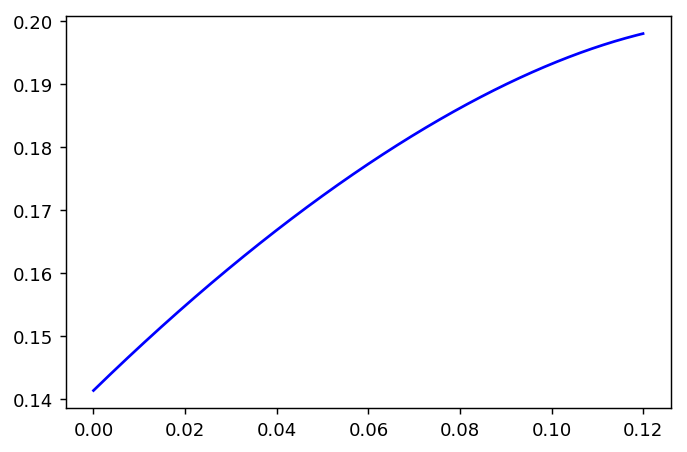

In [13]:
# frequency in Hz
freq = 50
Cap = 1e-1
phase = np.pi / 4.0

voltage = np.zeros(N, dtype = np.float64)

U0 = 0.2

voltage = U0 * np.sin( 2 * np.pi * freq * T0 * time)

current = U0 * np.sin( 2 * np.pi * freq * T0 * time + phase ) #+ np.random.randn(N) * 1e-3

# fitting
def fit_fun( time, a, shift  ):
    global freq, T0
    
    return ( a *  np.sin( 2 * np.pi * freq * T0 * time + shift) )

def fit_fun2( time, y0, k0, k1 ):
    global freq, T0
    
    return y0 + k0 * np.sin( 2 * np.pi * freq * time *T0 ) + k1 * np.cos( 2 * np.pi * freq * time *T0 )

p_initial = [ U0+1, np.pi]

popt, pcov = curve_fit( fit_fun2, time, current, p0 = None  )

# calculate parameter
A = np.sqrt( popt[1] ** 2 + popt[2] ** 2 )
shift = np.arctan( popt[2] / popt[1] )

print("A", A)
print("shift", np.rad2deg(shift))


# plotting

fig = plt.figure(dpi = 130)

ax = fig.add_subplot(1,1,1)

ax.plot(time, voltage, color = "blue")
ax.plot(time, current, color = "red")

# plot fitted curve
ax.plot(time, fit_fun2( time, popt[0], popt[1], popt[2] ), ls = "--", color =  "black")

plt.show()

print(popt)

print(pcov)

fig = plt.figure(dpi = 130)

ax = fig.add_subplot(1,1,1)

ax.plot(voltage, current, color = "blue")
#ax.plot(time, , color = "red")

# plot fitted curve
#ax.plot(time, fit_fun( time, popt[0], popt[1] ), ls = "--", color =  "black")

plt.show()

define min frequency and start frequency with good resolution

start frequency

outer loop

voltage pertubation

    inner loop
    
        current <-- simulation
    
    fit results
    
    calc impedance for this point
    